In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1.DateFrame

### 1.1 构建DataFrame

In [2]:
stock = np.random.normal(0, 1, (3, 5))
stock_code = ['股票' + str(i) for i in range(stock.shape[0])]
# date_range 构建日期序列
date = pd.date_range('2020-10-01', periods=stock.shape[1], freq="B")

In [3]:
pd.DataFrame(stock, index=stock_code, columns=date)

,2020-10-01,2020-10-02,2020-10-05,2020-10-06,2020-10-07
股票0,0.068693,0.513001,-0.222672,-0.988000,-1.062142
股票1,-0.506653,0.659590,-0.860057,0.071909,0.350385
股票2,1.110537,0.218277,-1.218335,-0.268890,0.328111


In [4]:
df = pd.read_csv("stock_day.csv")
df.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"], axis=1, inplace=True)
df.sort_index(inplace=True)

In [5]:
df.head()

,open,high,close,low,volume,price_change,p_change,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16


### 1.2 统计运算

In [6]:
# 直接得出很多统计结果,count, mean, std, min, max 等
df.describe()

,open,high,close,low,volume,price_change,p_change,turnover
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,21.272706,21.900513,21.336267,20.771835,99905.519114,0.018802,0.190280,2.936190
std,3.930973,4.077578,3.942806,3.791968,73879.119354,0.898476,4.079698,2.079375
min,12.250000,12.670000,12.360000,12.200000,1158.120000,-3.520000,-10.030000,0.040000
25%,19.000000,19.500000,19.045000,18.525000,48533.210000,-0.390000,-1.850000,1.360000
50%,21.440000,21.970000,21.450000,20.980000,83175.930000,0.050000,0.260000,2.500000
75%,23.400000,24.065000,23.415000,22.850000,127580.055000,0.455000,2.305000,3.915000
max,34.990000,36.350000,35.210000,34.010000,501915.410000,3.030000,10.030000,12.560000


In [7]:
# 中位数median
df.median()

open               21.44
high               21.97
close              21.45
low                20.98
volume          83175.93
price_change        0.05
p_change            0.26
turnover            2.50
dtype: float64

In [8]:
# 求出最大值的位置
df.idxmax()

open            2015-06-15
high            2015-06-10
close           2015-06-12
low             2015-06-12
volume          2017-10-26
price_change    2015-06-09
p_change        2015-08-28
turnover        2017-10-26
dtype: object

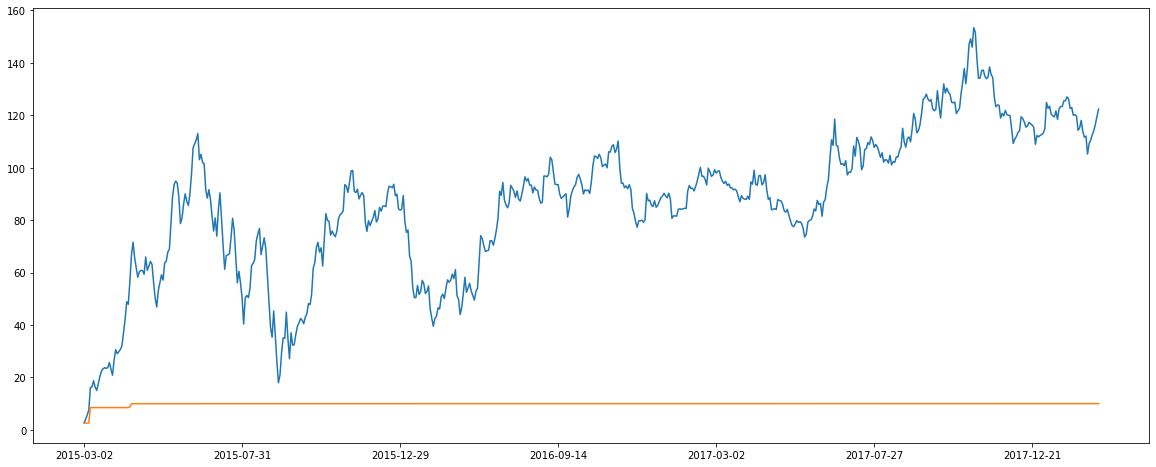

In [9]:
# 累计求和
df['p_change'].cumsum().plot(figsize=(20, 8))
# 求前N个数的最大值
df['p_change'].cummax().plot(figsize=(20, 8))
# 前n个数的积
# df['p_change'].cumprod().plot()
plt.show()

### 1.3 自定义运算

In [10]:
df[['open', 'close']].apply(lambda x: x.max() - x.min(), axis=0)

open     22.74
close    22.85
dtype: float64

### 1.4 缺失值处理

In [11]:
# 有缺失值返回True， 无缺失值返回False
np.any(pd.isnull(df))

False

In [12]:
# 无缺失值返回True， 有缺失值返回False
np.all(pd.notnull(df))

True

### 1.5 数据离散化

In [13]:
# 自动分组
qcut = pd.qcut(df['p_change'], 10)
qcut.value_counts()

(5.27, 10.03]                    65
(0.26, 0.94]                     65
(-0.462, 0.26]                   65
(-10.030999999999999, -4.836]    65
(2.938, 5.27]                    64
(1.738, 2.938]                   64
(-1.352, -0.462]                 64
(-2.444, -1.352]                 64
(-4.836, -2.444]                 64
(0.94, 1.738]                    63
Name: p_change, dtype: int64

In [14]:
qcut

2015-03-02    (1.738, 2.938]
2015-03-03     (0.94, 1.738]
2015-03-04     (0.94, 1.738]
2015-03-05    (1.738, 2.938]
2015-03-06     (5.27, 10.03]
                   ...      
2018-02-14    (1.738, 2.938]
2018-02-22     (0.94, 1.738]
2018-02-23    (1.738, 2.938]
2018-02-26     (2.938, 5.27]
2018-02-27    (1.738, 2.938]
Name: p_change, Length: 643, dtype: category
Categories (10, interval[float64]): [(-10.030999999999999, -4.836] < (-4.836, -2.444] < (-2.444, -1.352] < (-1.352, -0.462] ... (0.94, 1.738] < (1.738, 2.938] < (2.938, 5.27] < (5.27, 10.03]]

In [15]:
# 自定义分组
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
cut = pd.cut(df['p_change'], bins)
cut.value_counts()

(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(7, 100]       35
(5, 7]         35
(-100, -7]     34
(-7, -5]       28
Name: p_change, dtype: int64

In [16]:
# 自定义分组
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
cut = pd.cut(df['p_change'], bins)
cut.value_counts()

(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(7, 100]       35
(5, 7]         35
(-100, -7]     34
(-7, -5]       28
Name: p_change, dtype: int64

In [17]:
# 自定义分组
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
cut = pd.cut(df['p_change'], bins)
cut.value_counts()

(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(7, 100]       35
(5, 7]         35
(-100, -7]     34
(-7, -5]       28
Name: p_change, dtype: int64

In [18]:
# onehot编码
dummaries = pd.get_dummies(cut, prefix="rise")
dummaries

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2015-03-02,0,0,0,0,1,0,0,0
2015-03-03,0,0,0,0,1,0,0,0
2015-03-04,0,0,0,0,1,0,0,0
2015-03-05,0,0,0,0,1,0,0,0
2015-03-06,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
2018-02-14,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0


### 1.6 交叉表、透视表

In [19]:
# 交叉表
date = pd.to_datetime(df.index).weekday
rise_fall = np.where(df["p_change"] > 0, 1, 0)
count = pd.crosstab(date, rise_fall)
count

col_0,0,1
row_0,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


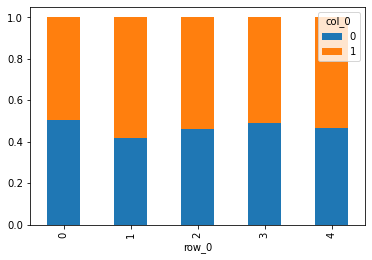

In [20]:
# 除法操作求比例
pro = count.div(count.sum(axis=1), axis=0)
pro.plot(kind='bar',stacked=True)
plt.show()

In [21]:
# 透视表
df['date'] = date
df['rise_fall'] = rise_fall
# 类似以index group后取values的均值（默认）
df.pivot_table(values=['rise_fall'], index=['date'])

,rise_fall
date,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


### 1.7 分组、聚合

In [22]:
col = pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})
col.head()

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [23]:
col.groupby(['color'], as_index=False)['price1'].mean()

,color,price1
0,green,2.025
1,red,2.380
2,white,5.560


## 2.Panel

In [51]:
data = np.random.rand(2,4,5)
p = pd.Panel()

<ipython-input-51-318e0fee2696>:2: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  p = pd.Panel()


In [49]:
p =pd.Panel(data)

<ipython-input-49-5f9cb7f861de>:1: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  p =pd.Panel(data)


TypeError: Panel() takes no arguments

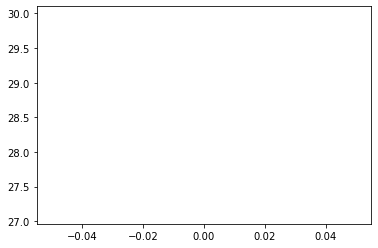

In [45]:
plt.plot(data[0].reshape(-1))